In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [3]:
from plotly.offline import iplot, init_notebook_mode

In [5]:
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [7]:
df = pd.read_excel("Plotting.xlsx")
df.head(2)

,Cholesterol,sBP,Creatinine,BUN,Group,Grade
0,99,57,0.7,10,A,IV
1,117,65,1.4,11,A,III


In [9]:
df.shape

(900, 6)

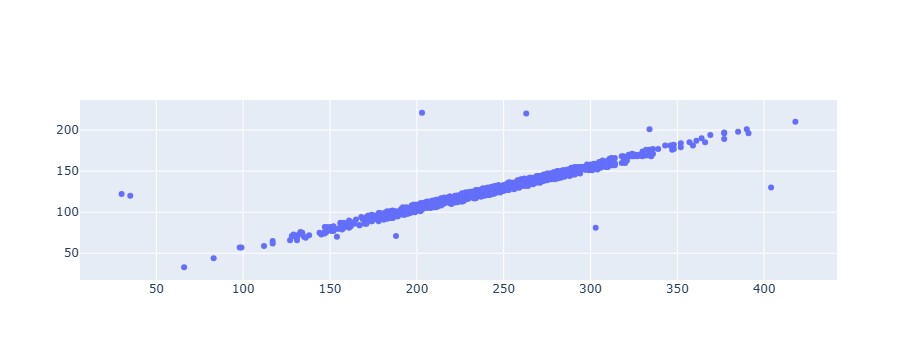

In [18]:
trace0 = go.Scatter(x=df.Cholesterol,
                    y = df.sBP,
                   mode = "markers")
data = [trace0]
iplot({"data":data})

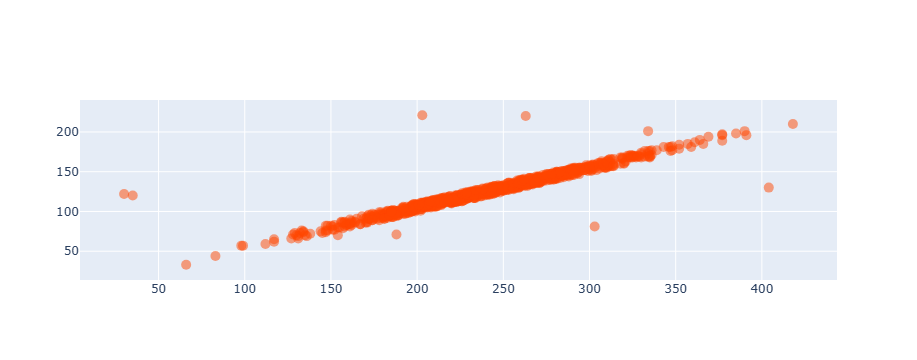

In [20]:
trace0 = go.Scatter(x=df.Cholesterol,
                    y = df.sBP,
                   mode = "markers",
                   marker={"size":10, "color":"rgba(255, 70, 0, 0.5)"})
data = [trace0]
iplot({"data":data})

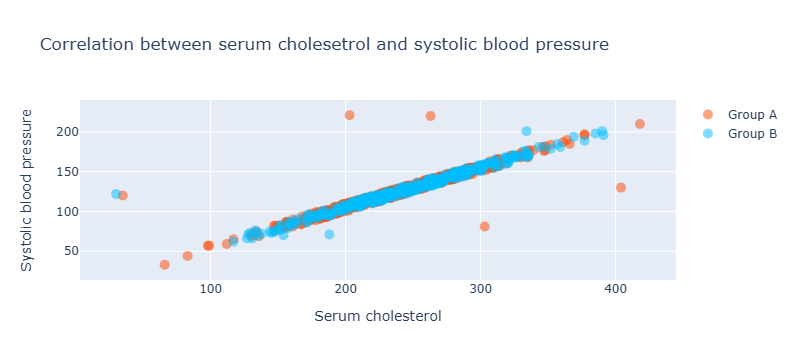

In [32]:
trace0 = go.Scatter(x=df[df["Group"] == "A"]["Cholesterol"],
                    y = df[df["Group"] == "A"]["sBP"],
                   mode = "markers",
                   marker= {"size":10, "color":"rgba(255, 70, 0, 0.5)"},
                   name = "Group A")

trace1 = go.Scatter(x=df[df["Group"] == "B"]["Cholesterol"],
                    y = df[df["Group"] == "B"]["sBP"],
                   mode = "markers",
                   marker= {"size":10, "color":"rgba(0, 190, 255, 0.5)"},
                   name = "Group B")
data = [trace0, trace1]
layout = {"title":"Correlation between serum cholesetrol and systolic blood pressure",
           "xaxis":{"title": "Serum cholesterol",
                    "zeroline":False},
           "yaxis":{"title": "Systolic blood pressure",
                    "zeroline":False}}
         
iplot({"data":data, "layout":layout})

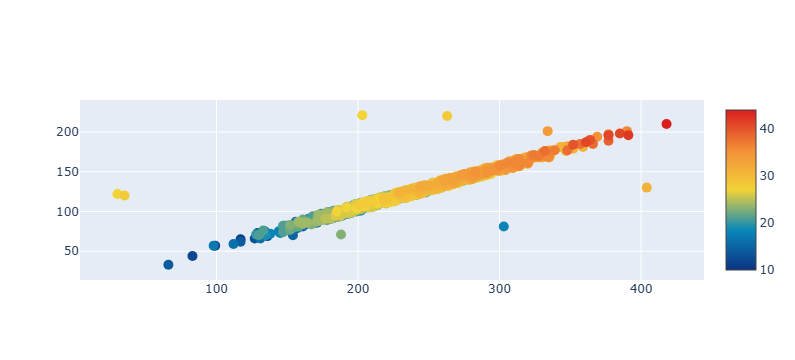

In [34]:
trace0 = go.Scatter(x=df.Cholesterol,
                    y = df.sBP,
                   mode = "markers",
                   marker={"size":10, 
                            "color": df.BUN,
                            "colorscale": "Portland",
                            "showscale":True})
data = [trace0]
iplot({"data":data})

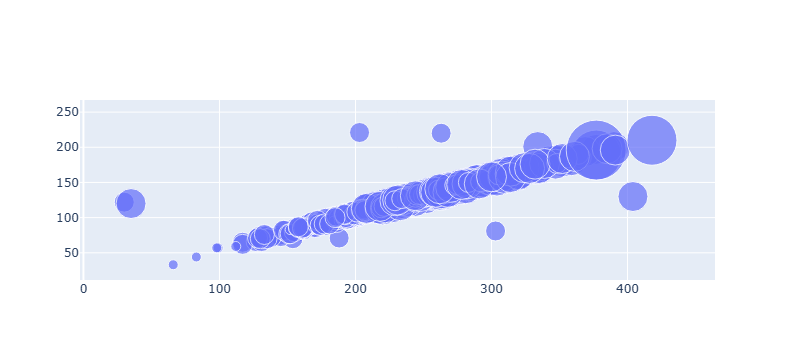

In [36]:
trace0 = go.Scatter(x=df.Cholesterol,
                    y = df.sBP,
                   mode = "markers",
                   marker = {"size":10*np.ceil(df.Creatinine)})
data = [trace0]
iplot({"data":data})

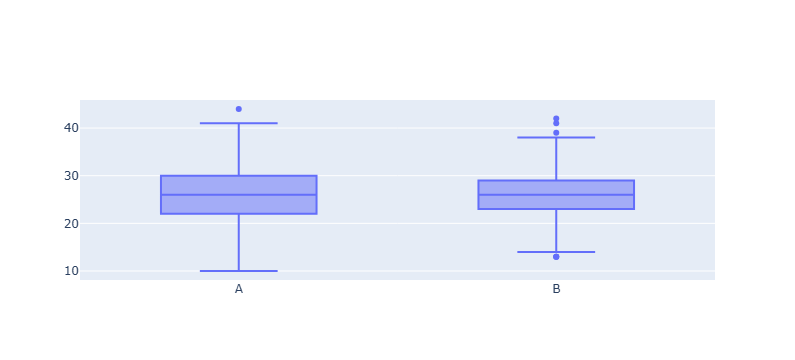

In [42]:
#Box plot
trace0=go.Box(y=df.BUN,
              x=df.Group,
             )
data = [trace0]
iplot({"data":data})

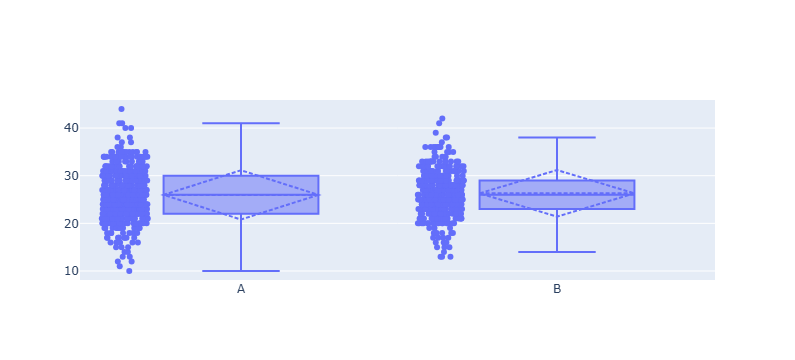

In [46]:
trace0=go.Box(y=df.BUN,
              x=df.Group,
             boxpoints= "all",
             jitter=0.3,
             pointpos= -1.5,
             boxmean="sd")
data = [trace0]
iplot({"data":data})

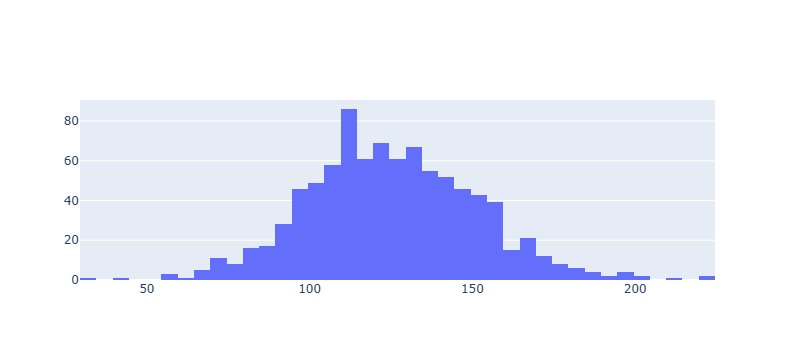

In [48]:
#Histogram
trace0=go.Histogram(x=df.sBP
              
             )
data = [trace0]
iplot({"data":data})

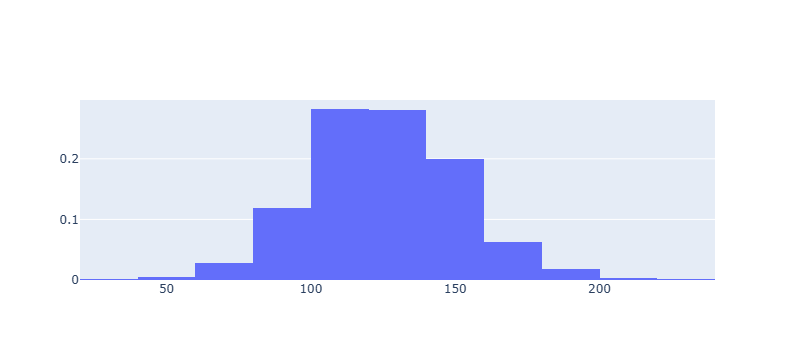

In [50]:
trace0=go.Histogram(x=df.sBP,
                    histnorm = "probability",
                    xbins = {"start":0,
                             "end":250,
                             "size":20 })
data = [trace0]
iplot({"data":data})

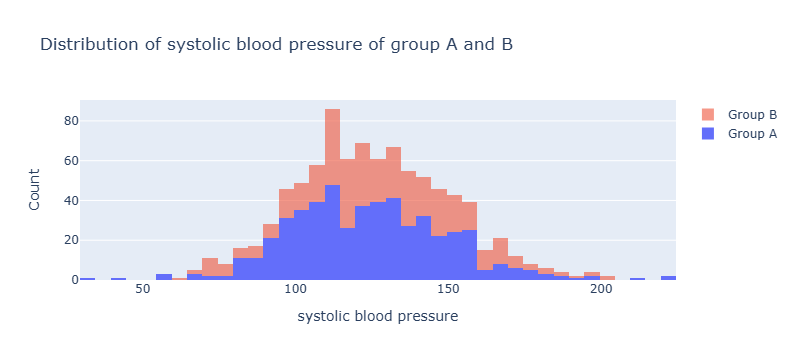

In [62]:
a = df[df.Group == "A"]
b = df[df.Group == "B"]
trace0=go.Histogram(x=a.sBP,
                   name = "Group A")

trace1=go.Histogram(x=b.sBP,
                   name = "Group B",
                   opacity= 0.6)
data = [trace0, trace1]
layout = {"title":"Distribution of systolic blood pressure of group A and B",
           "xaxis":{"title": "systolic blood pressure",
                    "zeroline":False},
           "yaxis":{"title": "Count",
                    "zeroline":False},
           "barmode" : "stack"}
iplot({"data":data, "layout": layout})

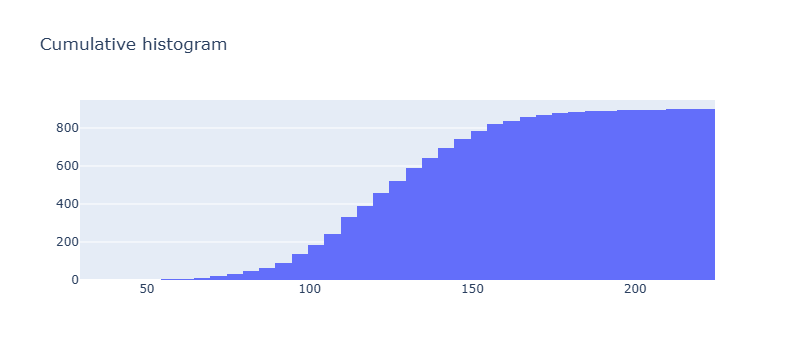

In [66]:
trace0=go.Histogram(x=df.sBP,
                    cumulative = {"enabled":True})
data = [trace0]
layout={"title":"Cumulative histogram"}
iplot({"data":data, "layout":layout})

In [68]:
#Dot plot
a.Grade.unique()

array(['IV', 'III', 'II', 'I'], dtype=object)

In [70]:
a.Grade.unique().tolist()

['IV', 'III', 'II', 'I']

In [72]:
np.sort(a.Grade.unique()).tolist()

['I', 'II', 'III', 'IV']

In [76]:
a.groupby("Grade").Cholesterol.mean()

Grade
I      235.733945
II     236.294118
III    238.608696
IV     233.990909
Name: Cholesterol, dtype: float64

In [78]:
a.groupby("Grade").Cholesterol.mean().tolist()

[235.73394495412845, 236.2941176470588, 238.6086956521739, 233.9909090909091]

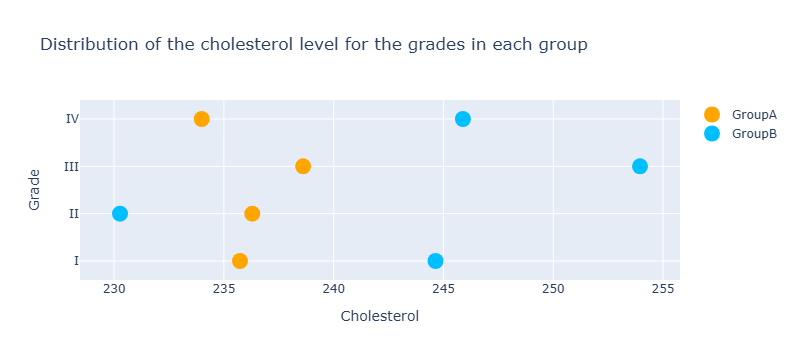

In [84]:
trace0 = {"x": a.groupby("Grade").Cholesterol.mean().tolist(),
          "y": np.sort(a.Grade.unique()).tolist(),
          "mode":"markers",
          "marker":{"color":"orange",
                    "size":16},
          "name":"GroupA",
          "type":"scatter"}

trace1 = {"x": b.groupby("Grade").Cholesterol.mean().tolist(),
          "y": np.sort(b.Grade.unique()).tolist(),
          "mode":"markers",
          "marker":{"color":"deepskyblue",
                    "size":16},
          "name":"GroupB",
          "type":"scatter"}
    
data = [trace0, trace1]
layout = {"title":"Distribution of the cholesterol level for the grades in each group",
           "xaxis":{"title": "Cholesterol"},     
           "yaxis":{"title": "Grade"}}     
      
iplot({"data":data, "layout":layout})

In [86]:
df.Group.value_counts()

Group
A    516
B    384
Name: count, dtype: int64

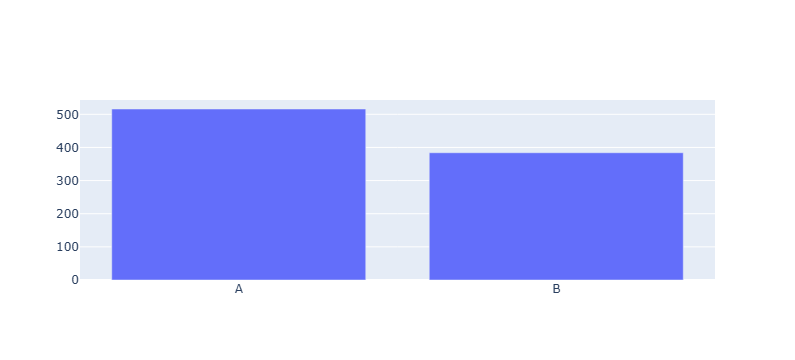

In [88]:
trace0=go.Bar(x=["A","B"],
              y=[516,384])
data = [trace0]
iplot({"data":data})

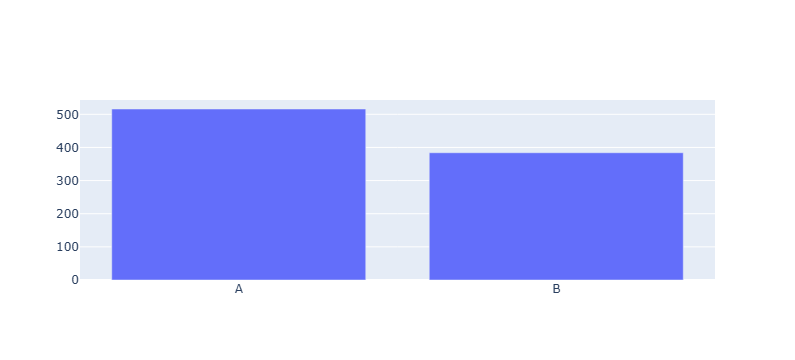

In [90]:
trace0=go.Bar(x=df.Group.unique().tolist(),
              y=df.Group.value_counts().tolist())
data = [trace0]
iplot({"data":data})

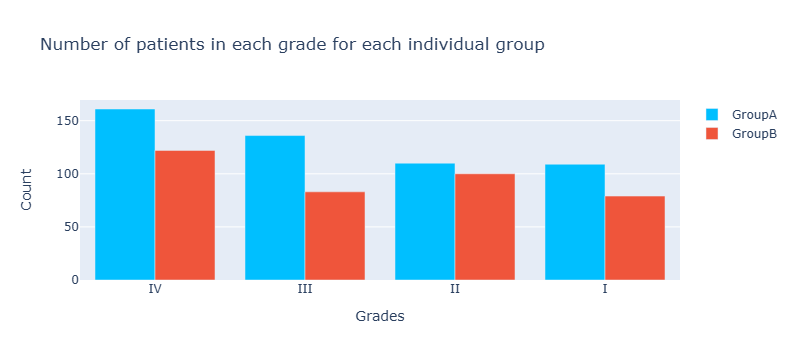

In [104]:
trace0 =  go.Bar(x=df[df.Group=="A"].Grade.unique().tolist(),
          y=df[df.Group=="A"].Grade.value_counts().tolist(),
          name="GroupA",
          marker = {"color":"deepskyblue"} )

trace1 = go.Bar(x=df[df.Group=="B"].Grade.unique().tolist(),
          y=df[df.Group=="B"].Grade.value_counts().tolist(),
          name="GroupB")
    

layout = {"title":"Number of patients in each grade for each individual group",
           "xaxis":{"title": "Grades"},     
           "yaxis":{"title": "Count",
                   "zeroline":False}}     
data = [trace0, trace1]     
iplot({"data":data, "layout":layout})